In [143]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
# add more ...
import seaborn as sns
import scipy as sci

In [3]:
# load data - slow
# data is from 2003/1/1 -2017/12/31
dataset = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [4]:
# for experimenting, delete later
print(dataset.columns)
small_data = dataset.head(5)
small_data

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110308742,MISSING PERSON,FOUND PERSON,Friday,04/15/2011,16:00,TARAVAL,LOCATED,0 Block of CRESPI DR,-122.476328,37.719687,"(37.7196874952717, -122.476327815126)",11030874275000
1,90316914,WARRANTS,WARRANT ARREST,Thursday,03/26/2009,12:28,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,"(37.7812707434494, -122.411339562557)",9031691463010
2,130132311,SECONDARY CODES,DOMESTIC VIOLENCE,Friday,02/15/2013,02:00,PARK,"ARREST, BOOKED",CASTRO ST / MARKET ST,-122.435188,37.762670,"(37.7626702770872, -122.435187699349)",13013231115200
3,80052833,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,01/15/2008,20:13,MISSION,"ARREST, CITED",VALENCIA ST / 16TH ST,-122.421886,37.764918,"(37.7649178909424, -122.421886357981)",8005283365016
4,70535770,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,05/26/2007,18:10,MISSION,"ARREST, BOOKED",2800 Block of FOLSOM ST,-122.413935,37.751693,"(37.7516932889916, -122.413935404044)",7053577015200


In [5]:
# find all Tenderloin data
def data_filter(raw_data, cond):
    # returns all the entries that satisfy COND, as a new data frame.
    output = raw_data
    clean = output.where(cond).dropna()
    return clean
tenderloin_data = data_filter(dataset, dataset['PdDistrict'] == 'TENDERLOIN')
# correct the date
tenderloin_data['Date'] = pd.to_datetime(tenderloin_data.Date)

In [6]:
# sort by date
tenderloin_data.sort_values('Date', inplace = True);

**1. Group by values and plot bar chart of incidents**

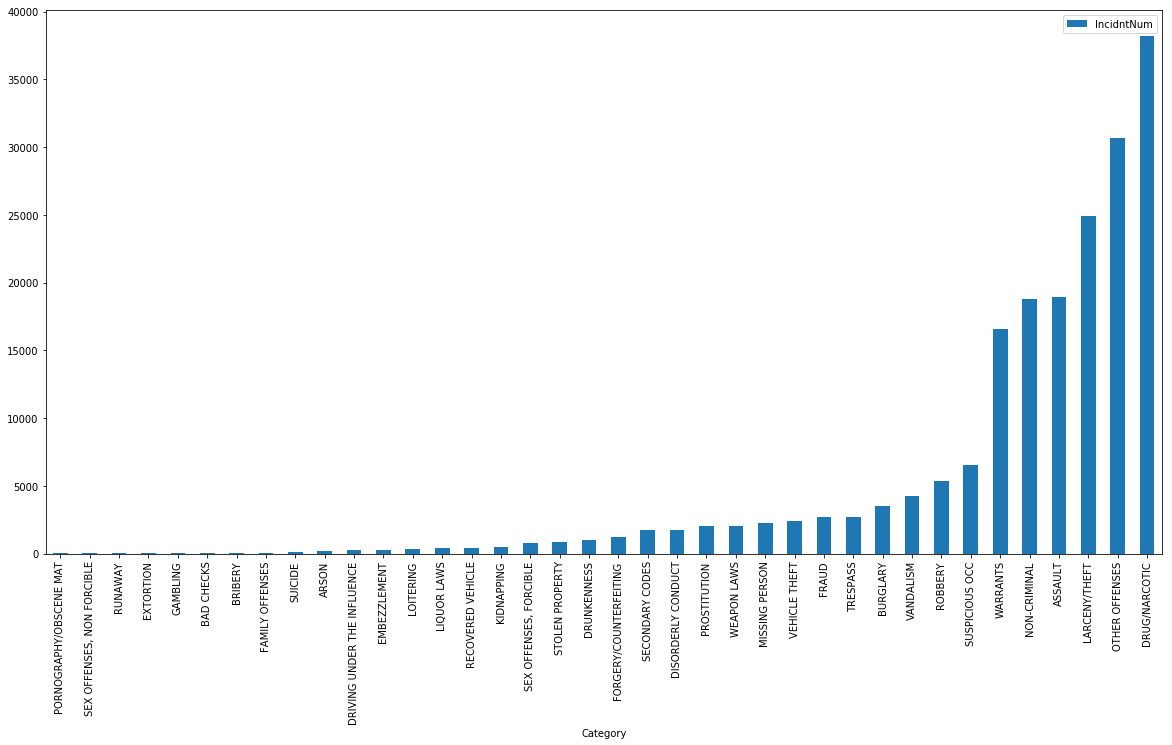

In [50]:
categories = tenderloin_data.groupby(['Category'])
count_incidents = categories.count()[['IncidntNum']]
count_incidents['Category'] = count_incidents.index
count_incidents.sort_values(["IncidntNum"], inplace=True, ascending=True)
# plot bar chart
categories = count_incidents['Category']
count_incidents.plot(x='Category',y='IncidntNum',kind='bar',figsize=(20,10));

**2. Computing crime rates**

In [42]:
dataset.sort_values(['Date'], inplace=True)
dataset_by_categories = dataset.groupby(['Category']).count()[['IncidntNum']].rename({'IncidntNum':'Incident Count'}, axis='columns')

In [48]:
dataset_by_categories.sort_values(['Incident Count'])
dataset_by_categories['Category'] = dataset_by_categories.index
total_incidents = np.sum(dataset_by_categories['Incident Count'])
crime_rates = (100 * dataset_by_categories['Incident Count'] / total_incidents).round(3).astype(str) + '%'
dataset_by_categories['Rate'] = crime_rates
dataset_by_categories.sort_values(['Incident Count'], ascending=False, inplace=True)
dataset_by_categories

,Incident Count,Category,Rate
Category,,,
LARCENY/THEFT,480448,LARCENY/THEFT,21.69%
OTHER OFFENSES,309358,OTHER OFFENSES,13.966%
NON-CRIMINAL,238323,NON-CRIMINAL,10.759%
ASSAULT,194694,ASSAULT,8.79%
VEHICLE THEFT,126602,VEHICLE THEFT,5.716%
DRUG/NARCOTIC,119628,DRUG/NARCOTIC,5.401%
VANDALISM,116059,VANDALISM,5.24%
WARRANTS,101379,WARRANTS,4.577%
BURGLARY,91543,BURGLARY,4.133%


In [56]:
dataset

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
1715594,30502703,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,01/01/2003,00:01,CENTRAL,NONE,1400 Block of CALIFORNIA ST,-122.418239,37.790933,"(37.7909332313364, -122.418239272625)",3050270364070
1776027,40401935,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,01/01/2003,09:00,PARK,NONE,800 Block of PAGE ST,-122.434769,37.772571,"(37.7725714571495, -122.434769120192)",4040193564070
558522,30002941,DRUG/NARCOTIC,POSSESSION OF BASE/ROCK COCAINE,Wednesday,01/01/2003,18:20,TENDERLOIN,"ARREST, BOOKED",400 Block of EDDY ST,-122.415067,37.783563,"(37.7835634796332, -122.41506687647)",3000294116621
2082254,30002703,ASSAULT,BATTERY,Wednesday,01/01/2003,16:55,MISSION,NONE,24TH ST / POTRERO AV,-122.406338,37.753004,"(37.7530042877269, -122.406338412693)",3000270304134
9552,50569200,ASSAULT,THREATS AGAINST LIFE,Wednesday,01/01/2003,00:01,INGLESIDE,NONE,0 Block of 27TH ST,-122.421899,37.747146,"(37.747145943185, -122.421898736352)",5056920019057
1658387,60313291,ASSAULT,THREATS AGAINST LIFE,Wednesday,01/01/2003,01:00,CENTRAL,NONE,800 Block of POST ST,-122.415822,37.787293,"(37.7872932910877, -122.415821891164)",6031329119057
2004670,30003701,WARRANTS,WARRANT ARREST,Wednesday,01/01/2003,22:24,MISSION,"ARREST, BOOKED",FLORIDA ST / 16TH ST,-122.411456,37.765549,"(37.7655489762105, -122.411456231276)",3000370163010
1646245,30002424,ASSAULT,AGGRAVATED ASSAULT WITH A DEADLY WEAPON,Wednesday,01/01/2003,15:15,TENDERLOIN,"ARREST, BOOKED",0 Block of JONES ST,-122.412193,37.781605,"(37.7816045741252, -122.412192555721)",3000242404013
1512753,30000939,MISSING PERSON,MISSING JUVENILE,Wednesday,01/01/2003,00:59,CENTRAL,LOCATED,300 Block of THE EMBARCADERO NORTH ST,-122.396374,37.798053,"(37.7980532528058, -122.396374439116)",3000093974010
1961192,70349678,"SEX OFFENSES, FORCIBLE",CHILD ABUSE SEXUAL,Wednesday,01/01/2003,00:01,INGLESIDE,COMPLAINANT REFUSES TO PROSECUTE,400 Block of MONTEREY BL,-122.445466,37.731460,"(37.7314603019564, -122.4454660739)",7034967814015


**3. Generate scatter plot**

After some exploratory data analysis, we begin building a map with all incidents scattered.

In [109]:
# takes care of the matching part, want to find only dates xx/xx/2017
import re
from math import *
date_2017 = re.compile(r"[\d]{1,2}/[\d]{1,2}/2017")
check_match = lambda string: date_2017.fullmatch(string) is not None
def take_data_from_year(cond, data):
    # want to subset the data according to cond, applied on 'Date' attribute
    keep = list(map(cond, data['Date']))
    return data[keep]
data_2017 = take_data_from_year(check_match, dataset)

In [175]:
# start building the KNN model to predict category
# of incident (what is statistcially more likely to 
# happen around there)
# 1. building a model using data from 2017
from sklearn.model_selection import train_test_split
#==================== utility functions
def point(x, y):
    # construct a point is a pair (represented as a list) of X-Y coordinates
    return np.array([x, y])

def distance(point1, point2):
    # takes in a np.array([X1, Y1]), np.array([X2, Y2]); returns the R2 distance
    p1x = point1[0]; p2x = point2[0];
    p1y = point1[1]; p2y = point2[1];
    return sqrt(abs(p1x-p2x) ** 2 + abs(p1y-p2y) ** 2)

def series_to_np(series):
    # converts a numpy array into series
    lst = []
    for i in range(len(series)):
        lst.append(series.iloc[i])
    converted = np.array(lst)
    return converted
#==================== functions on data set
def get_points(dataset):
    # using our dataset, returns a Data Frame containing all geographic points
    X = dataset['X']; Y = dataset['Y'];
    all_points = []
    for i in range(len(X)):
        p = point(X.iloc[i], Y.iloc[i]);
        all_points.append(p)
    return np.array(all_points)

def shuffle(dataframe):
    """ returns a fully shuffled dataframe """ 
    return dataframe.sample(frac=1)
def split_data(df, percentage=[0.5,0.5]):
    """ returns two new data frames, percentage[0] == training data, percentage[1] == test 
    data; by default, split by 50-50 """
    train, test = train_test_split(df, test_size=percentage[0])
    return train, test

In [128]:
# get and append points for easy use
all_points = get_points(data_2017)

In [140]:
# get the X, Y, Categories
X = series_to_np(data_2017['X'])
Y = series_to_np(data_2017['Y'])
cats = series_to_np(data_2017['Category'])

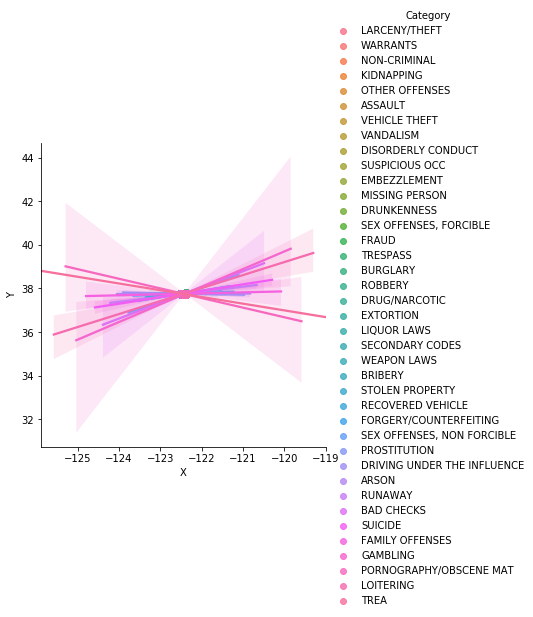

In [148]:
sns.lmplot(x='X', y='Y', hue = 'Category', data = data_2017)

In [165]:
data_2017

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
970631,170001691,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Sunday,01/01/2017,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,-122.403405,17000169106242
1084964,170111171,WARRANTS,ENROUTE TO ADULT AUTHORITY,Sunday,01/01/2017,12:00,CENTRAL,"ARREST, BOOKED",WASHINGTON ST / MASON ST,-122.411368,37.794525,-122.411368,17011117162060
1223521,170104643,NON-CRIMINAL,LOST PROPERTY,Sunday,01/01/2017,21:00,MISSION,NONE,22ND ST / VALENCIA ST,-122.420966,37.755294,-122.420966,17010464371000
971099,170001130,NON-CRIMINAL,"AIDED CASE, INJURED PERSON",Sunday,01/01/2017,10:48,TARAVAL,NONE,WAWONA ST / 19TH AV,-122.469667,37.738503,-122.469667,17000113064015
1133577,170002229,KIDNAPPING,"KIDNAPPING, ADULT VICTIM",Sunday,01/01/2017,17:00,MISSION,"ARREST, BOOKED",600 Block of GUERRERO ST,-122.423837,37.760743,-122.423837,17000222926141
918049,170000245,OTHER OFFENSES,TAMPERING WITH A VEHICLE,Sunday,01/01/2017,01:27,MISSION,"ARREST, BOOKED",2200 Block of MARKET ST,-122.432198,37.765111,-122.432198,17000024507100
1054313,170000483,ASSAULT,"BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP",Sunday,01/01/2017,02:16,INGLESIDE,"ARREST, BOOKED",0 Block of ARGONAUT AV,-122.413526,37.710585,-122.413526,17000048304138
916989,170000847,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,01/01/2017,00:12,TARAVAL,NONE,2600 Block of SAN JOSE AV,-122.451626,37.714808,-122.451626,17000084707021
1133599,170002229,KIDNAPPING,FALSE IMPRISONMENT,Sunday,01/01/2017,17:00,MISSION,"ARREST, BOOKED",600 Block of GUERRERO ST,-122.423837,37.760743,-122.423837,17000222926142
1054336,170002467,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,01/01/2017,17:00,PARK,NONE,WALLER ST / CLAYTON ST,-122.448391,37.768864,-122.448391,17000246706244


In [218]:
#=================== utility functions for KNN
def all_distances(training, new_point):
    """ Returns an array of distances
    between each point in the training set
    and the new point (which is a row of attributes) """
    coordinates = training.drop('Category',axis=1)
    def distance_from_point(entry):
        """returns distance from entry to point; assuming
        entry is of type df and contains {X, Y}"""
        return distance(entry, new_point)
    def apply_on_each_entry(function, df):
        """ returns the results of applying FUNCTION on each entry in a
        DF dataset. """
        lst = []
        for i in range(len(df)):
            entry = df.iloc[i]
            lst.append(distance_from_point(entry))
        return np.array(lst)
    return apply_on_each_entry(distance_from_point, coordinates)

def with_distance_to_point(training, new_point):
    """ Returns training, modified with a new column of all distances to NEW_POINT, sorted in
    ascending order by DISTANCE. """
    every_distance = all_distances(training, new_point)
    copy = training
    copy['Distance from NEW'] = every_distance
    copy.sort_values('Distance from NEW', ascending=True);
    return copy

In [220]:
# here we begin writing the kNN classifier:
classifier_data = data_2017[['Category', 'X', 'Y']]
training, testing = split_data(classifier_data, [0.7, 0.3])
training.head(20).drop('Category',axis=1); # peeking